In [1]:
# noinspection PyUnresolvedReferences
# noinspection PyUnresolvedReferences
# from ipynb.fs.full.preparation import expanded_df, expanded_df2

Datasets: 8. Strategies: 3. Single dataset Formulae:3073
Datasets: 8. Strategies: 3. Single dataset Formulae:4221
Datasets: 8. Strategies: 3. Single dataset Formulae:5111
Datasets: 8. Strategies: 3. Single dataset Formulae:5072


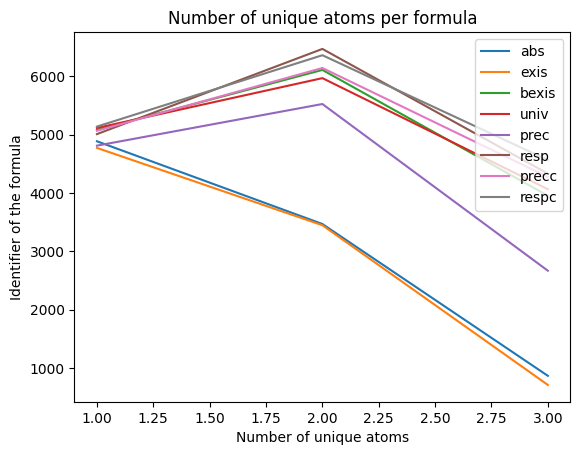

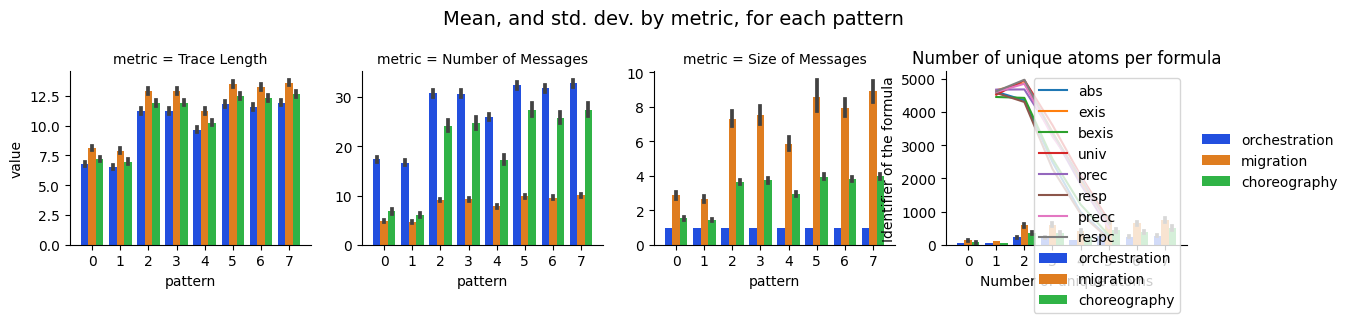

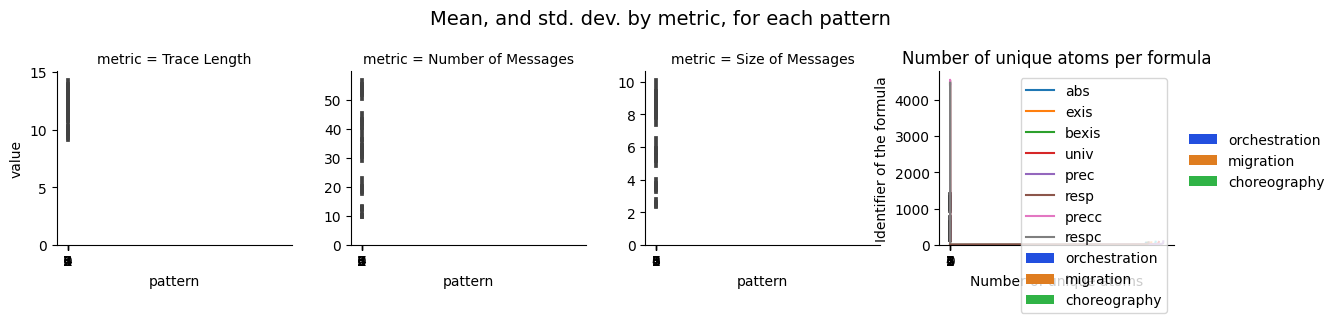

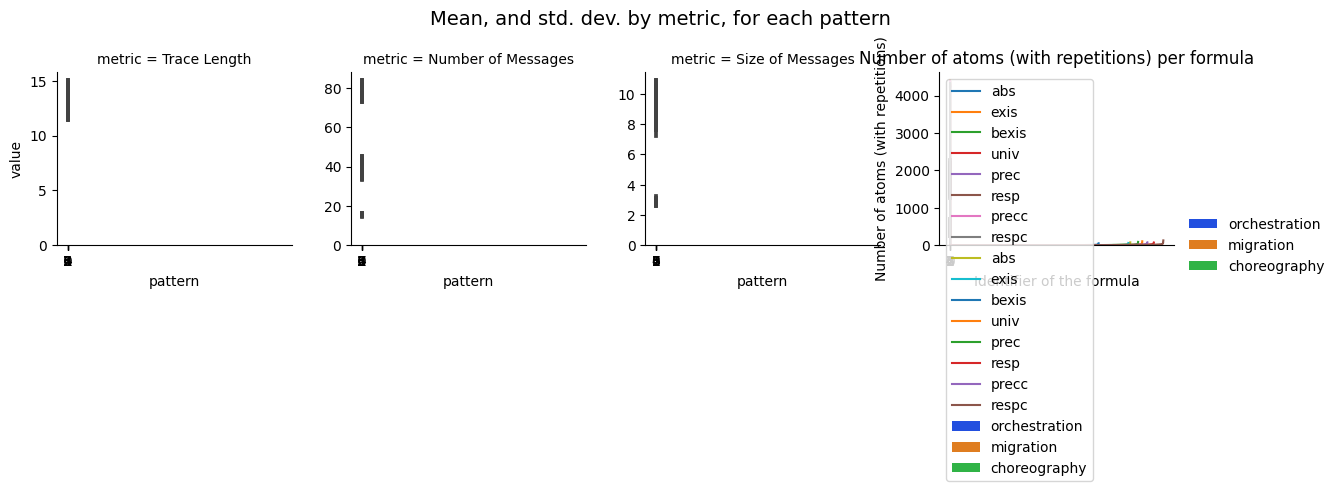

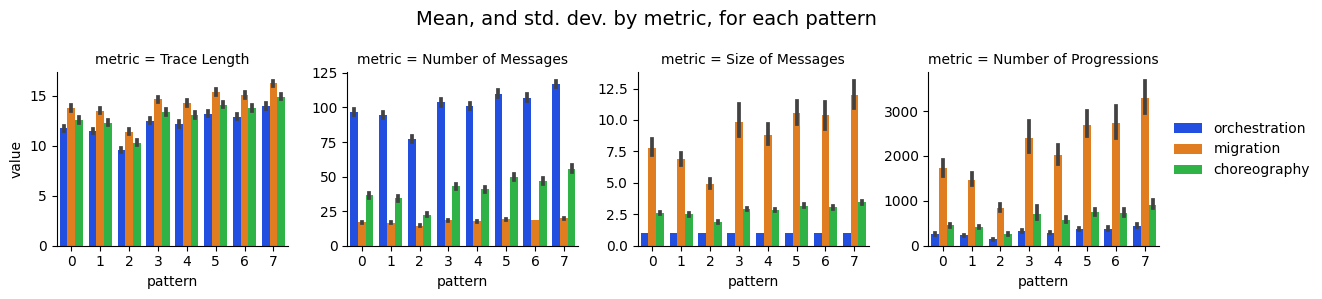

In [2]:
# noinspection PyUnresolvedReferences
from ipynb.fs.full.full_data_3 import full_scale_df_3
from ipynb.fs.full.full_data_5 import full_scale_df_5
from ipynb.fs.full.full_data_7 import full_scale_df_7
from ipynb.fs.full.full_data_9 import full_scale_df_9

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression

from decmon.learning import *

## Classification

We drop columns that are not numeric (and in our case, present in the dataset in other forms)

In [4]:
cols_to_drop = ['formula', 'strategy', 'trace']

In [5]:
TARGET = 'strategy_id'
N_CLASSES = 3 # orchestration, migration, choreography

In [6]:
# print(full_scale_df.groupby(['formula']).max())
# indexed = full_scale_df.set_index(['formula'], append=True).swaplevel(0, 1).sort_values(['formula', 'nb_progressions'], ascending=True)
# indexed.head()
# indexed['strategy_id']

In [7]:
# test = indexed.query('nb_progressions == nb_progressions.max()')
# test
# idx = indexed.groupby(level=0)['nb_progressions'].mean()
# indexed[indexed.index.isin(idx)]
# full_scale_df2 = full_scale_df.sort_values(['nb_progressions'], ascending=True).groupby(['formula']).agg(f)
# full_scale_df2.reset_index(inplace=True, drop=True)

In [8]:
# final_df = clean_df(full_scale_df2, cols_to_drop)
# final_df['strategy_id'].value_counts()

In [9]:
# X_train, X_test, y_train, y_test = prepare_learning_sets(final_df, TARGET)

In [17]:
import numpy as np

def classify_by_metric(original_df: DataFrame, metric: str, technique: any):
    f = dict.fromkeys(original_df, 'first')
    f.update({
        'x':'mean',
        'trace_len':'mean', 
        'num_mess':'mean', 
        'size_mess':'mean', 
        'nb_progressions':'mean',
        })
    
    print(f"Metric: {metric}")
    newdf = original_df.sort_values([metric], ascending=True).groupby(['formula']).agg(f)
    newdf.reset_index(inplace=True, drop=True)
    fdf = clean_df(newdf, cols_to_drop)
    print(f"Value counts:\n{fdf['strategy_id'].value_counts()}")
    X_train, X_test, y_train, y_test = prepare_learning_sets(fdf, TARGET)
    classifier = technique.fit(X_train, y_train)
    mean_accuracy = classifier.score(X_test, y_test)
    print(f"Accuracy: {mean_accuracy}")
    pred_y = classifier.predict(X_test)
    f1 = f1_score(pred_y, y_test, average=None)
    print(f"F1: {f1}")
    print(f"------------------------")


### System dim. 3

In [18]:
classify_by_metric(full_scale_df_3, 'nb_progressions', KNeighborsClassifier(n_neighbors=N_CLASSES))
classify_by_metric(full_scale_df_3, 'num_mess', KNeighborsClassifier(n_neighbors=N_CLASSES))
classify_by_metric(full_scale_df_3, 'size_mess', KNeighborsClassifier(n_neighbors=N_CLASSES))
classify_by_metric(full_scale_df_3, 'trace_len', KNeighborsClassifier(n_neighbors=N_CLASSES))

Metric: nb_progressions
Value counts:
2    14102
0      557
1       12
Name: strategy_id, dtype: int64
Accuracy: 0.953430258973194
F1: [0.08108108 0.         0.97611001]
------------------------
Metric: num_mess
Value counts:
1    12228
0     2417
2       26
Name: strategy_id, dtype: int64
Accuracy: 0.8671058609722854
F1: [0.53344077 0.92258833 0.        ]
------------------------
Metric: size_mess
Value counts:
2    13246
0     1273
1      152
Name: strategy_id, dtype: int64
Accuracy: 0.9470695138573376
F1: [0.72162162 0.32727273 0.97215632]
------------------------
Metric: trace_len
Value counts:
2    12969
0     1696
1        6
Name: strategy_id, dtype: int64
Accuracy: 0.8587005906406179
F1: [0.13128492 0.92309594]
------------------------


### System dim. 5

In [12]:
classify_by_metric(full_scale_df_5, 'nb_progressions')
classify_by_metric(full_scale_df_5, 'num_mess')
classify_by_metric(full_scale_df_5, 'size_mess')
classify_by_metric(full_scale_df_5, 'trace_len')

Metric: nb_progressions
Value counts:
2    18621
0      403
1        2
Name: strategy_id, dtype: int64
Accuracy: 0.9774001401541695
F1: [0.11034483 0.9885547 ]
------------------------
Metric: num_mess
Value counts:
1    15501
0     3525
Name: strategy_id, dtype: int64
Accuracy: 0.8826208829712684
F1: [0.64132762 0.92982824]
------------------------
Metric: size_mess
Value counts:
2    17346
0     1429
1      251
Name: strategy_id, dtype: int64
Accuracy: 0.956552207428171
F1: [0.75481386 0.54135338 0.97677075]
------------------------
Metric: trace_len
Value counts:
2    17283
0     1741
1        2
Name: strategy_id, dtype: int64
Accuracy: 0.8950595655220743
F1: [0.13062409 0.9441596 ]
------------------------


In [13]:
classify_by_metric(full_scale_df_7, 'nb_progressions')
classify_by_metric(full_scale_df_7, 'num_mess')
classify_by_metric(full_scale_df_7, 'size_mess')
classify_by_metric(full_scale_df_7, 'trace_len')

Metric: nb_progressions
Value counts:
2    23683
0      404
Name: strategy_id, dtype: int64
Accuracy: 0.9835339698353397
F1: [0.25157233 0.99167541]
------------------------
Metric: num_mess
Value counts:
1    19290
0     4797
Name: strategy_id, dtype: int64
Accuracy: 0.8872284488722845
F1: [0.68026677 0.93154137]
------------------------
Metric: size_mess
Value counts:
2    21980
0     1681
1      426
Name: strategy_id, dtype: int64
Accuracy: 0.9564134495641345
F1: [0.77127072 0.53386454 0.97698902]
------------------------
Metric: trace_len
Value counts:
2    22188
0     1895
1        4
Name: strategy_id, dtype: int64
Accuracy: 0.9104746091047461
F1: [0.15223097 0.         0.95274268]
------------------------


In [14]:
classify_by_metric(full_scale_df_9, 'nb_progressions')
classify_by_metric(full_scale_df_9, 'num_mess')
classify_by_metric(full_scale_df_9, 'size_mess')
classify_by_metric(full_scale_df_9, 'trace_len')

Metric: nb_progressions
Value counts:
2    24710
0      441
Name: strategy_id, dtype: int64
Accuracy: 0.9795918367346939
F1: [0.15384615 0.98967136]
------------------------
Metric: num_mess
Value counts:
1    18820
0     6331
Name: strategy_id, dtype: int64
Accuracy: 0.884574609064405
F1: [0.74702295 0.92522963]
------------------------
Metric: size_mess
Value counts:
2    22725
0     1825
1      601
Name: strategy_id, dtype: int64
Accuracy: 0.956268221574344
F1: [0.78172589 0.62908012 0.97676107]
------------------------
Metric: trace_len
Value counts:
2    23109
0     2039
1        3
Name: strategy_id, dtype: int64
Accuracy: 0.9147892923403127
F1: [0.21542228 0.         0.95494991]
------------------------


## SVM

In [19]:
from sklearn import svm

### Dim 3

In [22]:
classify_by_metric(full_scale_df_3, 'nb_progressions', svm.SVC(decision_function_shape='ovr'))
classify_by_metric(full_scale_df_3, 'num_mess', svm.SVC(decision_function_shape='ovr'))
classify_by_metric(full_scale_df_3, 'size_mess', svm.SVC(decision_function_shape='ovr'))
classify_by_metric(full_scale_df_3, 'trace_len', svm.SVC(decision_function_shape='ovr'))

Metric: nb_progressions
Value counts:
2    14102
0      557
1       12
Name: strategy_id, dtype: int64
Accuracy: 0.9606996819627442
F1: [0.         0.         0.97995597]
------------------------
Metric: num_mess
Value counts:
1    12228
0     2417
2       26
Name: strategy_id, dtype: int64
Accuracy: 0.8246251703771014
F1: [0.         0.90388446 0.        ]
------------------------
Metric: size_mess
Value counts:
2    13246
0     1273
1      152
Name: strategy_id, dtype: int64
Accuracy: 0.8975465697410268
F1: [0.         0.         0.94600742]
------------------------
Metric: trace_len
Value counts:
2    12969
0     1696
1        6
Name: strategy_id, dtype: int64
Accuracy: 0.8832348932303499
F1: [0.         0.93799759]
------------------------
